In [1]:
import sys
sys.path.append('..')
from nbhd.data import Base
from nbhd.geography import Neighbourhood
from nbhd.geometry import *

Initializing database connection...
Database connected!


In [2]:
n = Neighbourhood()

Getting data took 0 minutes, 0 seconds.


In [3]:
from shapely.geometry import MultiLineString

In [4]:
def cellularize(pts_geoseries, polygon):
    'Return geodataframe of Voronoi cells for points in polygon.'
    
    points = np.array([[p.x, p.y] for p in pts_geoseries])

    vor = Voronoi(points) 
    lines = [
        LineString(vor.vertices[line])
        for line in vor.ridge_vertices
    ]
    
    lines_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(lines))
    lines_gdf.geometry = lines_gdf.geometry.apply(
        lambda x: MultiLineString([line for line
                                in list(split(x, n.geom.boundary))
                                if n.geom.buffer(1).contains(line)
                               ]))
    boundary_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(n.geom.boundary))
    cells_gdf = tessellate([boundary_gdf, lines_gdf])
    
    return cells_gdf



In [5]:
cells = cellularize(n.uprn.geometry, n.geom)

In [6]:
from mapclassify import greedy

In [7]:
cells['c'] = greedy(cells)

<AxesSubplot:>

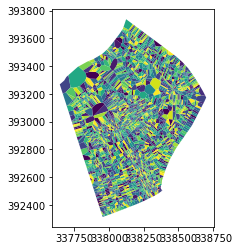

In [8]:
cells.plot('c')